# <b><u>Problem Statement :</u></b> Predict prep_time_minutes using orders & restaurants datasets

# <b><font color = Blue>Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timezone
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.getcwd()

'/Users/aagya/Food_Prep_Time_Model'

# <b><font color = Blue>Read input files

In [3]:
df_orders = pd.read_csv('./input/orders.csv')

In [4]:
df_orders.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314


In [5]:
df_orders.info()
#32394 Rows & 6 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32394 entries, 0 to 32393
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_acknowledged_at  32394 non-null  object 
 1   order_ready_at         32394 non-null  object 
 2   order_value_gbp        32394 non-null  float64
 3   restaurant_id          32394 non-null  int64  
 4   number_of_items        32394 non-null  int64  
 5   prep_time_seconds      32394 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [6]:
df_orders.nunique()
#No of unique values in each of the six columns

order_acknowledged_at    32394
order_ready_at           32394
order_value_gbp           2845
restaurant_id             1697
number_of_items             29
prep_time_seconds         4104
dtype: int64

In [7]:
df_restaurants = pd.read_csv('./input/restaurants.csv')

In [8]:
df_restaurants.head()

,restaurant_id,country,city,type_of_food
0,3,UK,London,thai
1,5,UK,London,italian
2,7,UK,London,italian
3,8,UK,London,chinese
4,9,France,Paris,korean


In [9]:
df_restaurants.info()
#1697 Rows & 4 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  1697 non-null   int64 
 1   country        1697 non-null   object
 2   city           1697 non-null   object
 3   type_of_food   1697 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.2+ KB


# <b><font color = blue> Data Preparation

# Join both input sets using restaurant_id as the key

In [10]:
df_final = pd.merge(df_orders,df_restaurants, on = 'restaurant_id', how = 'inner')

In [11]:
df_final.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,UK,London,burritos
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,UK,London,burritos
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,UK,London,burritos
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,UK,London,burritos
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,UK,London,chinese


In [12]:
df_final.info()
#32394 Rows & 9 Columns ; 0 Missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_acknowledged_at  32394 non-null  object 
 1   order_ready_at         32394 non-null  object 
 2   order_value_gbp        32394 non-null  float64
 3   restaurant_id          32394 non-null  int64  
 4   number_of_items        32394 non-null  int64  
 5   prep_time_seconds      32394 non-null  int64  
 6   country                32394 non-null  object 
 7   city                   32394 non-null  object 
 8   type_of_food           32394 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.5+ MB


# Numerical Features

In [13]:
df_final.describe()
# Details of Numerical features

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
count,32394.000000,32394.000000,32394.000000,32394.000000
mean,26.547303,1290.555535,4.025715,1299.993857
std,19.263851,960.295504,2.392063,4404.573191
min,0.500000,3.000000,1.000000,0.000000
25%,16.700000,408.000000,3.000000,518.000000
50%,21.400000,1160.000000,3.000000,820.000000
75%,30.250000,2117.000000,5.000000,1227.000000
max,711.000000,3622.000000,38.000000,255499.000000


# Non-numerical Features

# 1. Remove local timezone from order_acknowledged_at & order_ready_at

In [14]:
#Change the object to datetime
df_final['order_acknowledged_at'] = pd.to_datetime(df_final.order_acknowledged_at, format='%Y-%m-%d %H:%M:%S')
df_final['order_ready_at'] = pd.to_datetime(df_final.order_ready_at, format='%Y-%m-%d %H:%M:%S')

In [15]:
def remove_timezone(dt):
    return dt.replace(tzinfo=None)

In [16]:
df_final['acknowledged_time'] = df_final['order_acknowledged_at'].apply(remove_timezone)
df_final['ready_time'] = df_final['order_ready_at'].apply(remove_timezone)

In [17]:
df_final.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,acknowledged_time,ready_time
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,UK,London,burritos,2015-06-01 12:28:28.952789,2015-06-01 14:12:09.474896
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,UK,London,burritos,2015-06-06 17:06:24.434807,2015-06-06 17:16:27.520253
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,UK,London,burritos,2015-06-08 14:56:15.503204,2015-06-08 15:03:39.397496
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,UK,London,burritos,2015-06-12 15:12:20.497925,2015-06-12 15:23:30.064683
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,UK,London,chinese,2015-06-01 13:07:10.794050,2015-06-01 14:02:25.104517


In [18]:
#Drop columns : order_acknowledged_at, order_ready_at & restaurant_id
df_final.drop(['order_acknowledged_at', 'order_ready_at', 'restaurant_id'], axis=1 , inplace=True)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_value_gbp    32394 non-null  float64       
 1   number_of_items    32394 non-null  int64         
 2   prep_time_seconds  32394 non-null  int64         
 3   country            32394 non-null  object        
 4   city               32394 non-null  object        
 5   type_of_food       32394 non-null  object        
 6   acknowledged_time  32394 non-null  datetime64[ns]
 7   ready_time         32394 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 2.2+ MB


# 2. Extract Year, Month & Weekday from acknowledged_time

In [20]:
df_final['order_year'] = df_final['acknowledged_time'].dt.year
df_final['order_month'] = df_final['acknowledged_time'].dt.month
df_final['order_Weekday'] = df_final['acknowledged_time'].apply(lambda time: time.day_name())

In [21]:
df_final.head()

,order_value_gbp,number_of_items,prep_time_seconds,country,city,type_of_food,acknowledged_time,ready_time,order_year,order_month,order_Weekday
0,59.90,2,6220,UK,London,burritos,2015-06-01 12:28:28.952789,2015-06-01 14:12:09.474896,2015,6,Monday
1,24.00,8,603,UK,London,burritos,2015-06-06 17:06:24.434807,2015-06-06 17:16:27.520253,2015,6,Saturday
2,15.25,3,443,UK,London,burritos,2015-06-08 14:56:15.503204,2015-06-08 15:03:39.397496,2015,6,Monday
3,28.05,8,669,UK,London,burritos,2015-06-12 15:12:20.497925,2015-06-12 15:23:30.064683,2015,6,Friday
4,56.30,7,3314,UK,London,chinese,2015-06-01 13:07:10.794050,2015-06-01 14:02:25.104517,2015,6,Monday


In [22]:
df_final["prep_time_minutes"] = df_final["prep_time_seconds"]/60

In [23]:
#Drop columns acknowledged_time & ready_time
df_final.drop(['acknowledged_time', 'ready_time','prep_time_seconds'], axis=1 , inplace=True)

In [24]:
df_final.head()

,order_value_gbp,number_of_items,country,city,type_of_food,order_year,order_month,order_Weekday,prep_time_minutes
0,59.90,2,UK,London,burritos,2015,6,Monday,103.666667
1,24.00,8,UK,London,burritos,2015,6,Saturday,10.050000
2,15.25,3,UK,London,burritos,2015,6,Monday,7.383333
3,28.05,8,UK,London,burritos,2015,6,Friday,11.150000
4,56.30,7,UK,London,chinese,2015,6,Monday,55.233333


# 2. Convert object datatype to category

In [25]:
list_str_obj_cols = df_final.columns[df_final.dtypes == "object"].tolist()
for col in list_str_obj_cols:
    df_final[col] = df_final[col].astype("category")
df_final.dtypes

order_value_gbp       float64
number_of_items         int64
country              category
city                 category
type_of_food         category
order_year              int64
order_month             int64
order_Weekday        category
prep_time_minutes     float64
dtype: object

In [26]:
df_final['order_year'] = df_final['order_year'].astype('category')
df_final['order_month'] = df_final['order_month'].astype('category')

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   order_value_gbp    32394 non-null  float64 
 1   number_of_items    32394 non-null  int64   
 2   country            32394 non-null  category
 3   city               32394 non-null  category
 4   type_of_food       32394 non-null  category
 5   order_year         32394 non-null  category
 6   order_month        32394 non-null  category
 7   order_Weekday      32394 non-null  category
 8   prep_time_minutes  32394 non-null  float64 
dtypes: category(6), float64(2), int64(1)
memory usage: 1.2 MB


# Understand Data

In [28]:
df_final.country.unique()

['UK', 'France', 'Ireland', 'Germany']
Categories (4, object): ['France', 'Germany', 'Ireland', 'UK']

In [29]:
df_final.city.unique()

['London', 'Paris', 'Edinburgh', 'Manchester', 'Oxford', ..., 'München', 'Cheltenham', 'Cardiff', 'Leicester', 'Southampton']
Length: 22
Categories (22, object): ['Berlin', 'Birmingham', 'Brighton', 'Bristol', ..., 'Oxford', 'Paris', 'Reading', 'Southampton']

In [30]:
df_final.type_of_food.unique()

['burritos', 'chinese', 'healthy', 'dessert', 'thai', ..., 'russian', 'steakhouse', 'south american', 'japanese peruvian', 'ice cream']
Length: 83
Categories (83, object): ['american', 'american / brunch', 'argentinian', 'asian fusion', ..., 'thaï / brunch', 'turkish', 'vegan', 'vietnamese']

In [31]:
df_final.order_year.unique()
#Drop column order_year as there is only 1 value in it
df_final.drop('order_year', axis = 1, inplace = True)

In [32]:
df_final.order_Weekday.unique()

['Monday', 'Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Sunday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [33]:
df_final.order_month.unique()

[6, 7]
Categories (2, int64): [6, 7]

In [34]:
df_final.order_month.value_counts()

6    32390
7        4
Name: order_month, dtype: int64

In [35]:
df_final.drop('order_month', axis = 1, inplace = True)

In [36]:
df_final.info()
#8 Columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   order_value_gbp    32394 non-null  float64 
 1   number_of_items    32394 non-null  int64   
 2   country            32394 non-null  category
 3   city               32394 non-null  category
 4   type_of_food       32394 non-null  category
 5   order_Weekday      32394 non-null  category
 6   prep_time_minutes  32394 non-null  float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 1.1 MB


In [37]:
df_final[df_final.prep_time_minutes == 0].shape[0]


103

In [38]:
df_final[(df_final.prep_time_minutes > 0) & (df_final.prep_time_minutes <= 10) ].shape[0]

10167

In [39]:
df_final[(df_final.prep_time_minutes > 10) & (df_final.prep_time_minutes <= 20) ].shape[0]

13613

In [40]:
df_final[(df_final.prep_time_minutes > 20) & (df_final.prep_time_minutes <= 30) ].shape[0]

4915

In [41]:
df_final[(df_final.prep_time_minutes > 30) & (df_final.prep_time_minutes <= 40) ].shape[0]

1274

In [42]:
df_final[(df_final.prep_time_minutes > 40) & (df_final.prep_time_minutes <= 50) ].shape[0]

694

In [43]:
df_final[(df_final.prep_time_minutes <= 60)].shape[0]
#96% of the total data
#Remove records with more than 60 minutes preparation time

31240

In [44]:
df_final = df_final[(df_final.prep_time_minutes <= 60)]
df_final.head()

,order_value_gbp,number_of_items,country,city,type_of_food,order_Weekday,prep_time_minutes
1,24.00,8,UK,London,burritos,Saturday,10.050000
2,15.25,3,UK,London,burritos,Monday,7.383333
3,28.05,8,UK,London,burritos,Friday,11.150000
4,56.30,7,UK,London,chinese,Monday,55.233333
5,18.20,3,UK,London,chinese,Monday,17.483333


In [45]:
print(df_final.shape)

(31240, 7)


# <b><font color = blue>Exploratory Analysis

# 1. Univariate Analysis 

<AxesSubplot:xlabel='number_of_items', ylabel='count'>

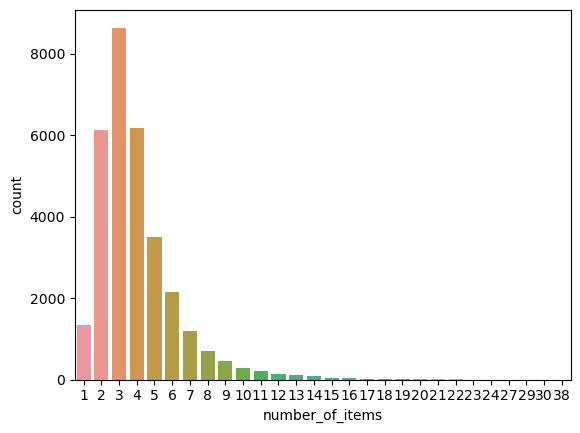

In [46]:
sns.countplot(x = df_final.number_of_items)

In [47]:
df_final[df_final["number_of_items"] > 15].count()

order_value_gbp      105
number_of_items      105
country              105
city                 105
type_of_food         105
order_Weekday        105
prep_time_minutes    105
dtype: int64

In [48]:
df_final[df_final["number_of_items"] == 3].count()

order_value_gbp      8636
number_of_items      8636
country              8636
city                 8636
type_of_food         8636
order_Weekday        8636
prep_time_minutes    8636
dtype: int64

In [49]:
df_final = df_final[(df_final.number_of_items <= 15)]

<AxesSubplot:xlabel='country', ylabel='count'>

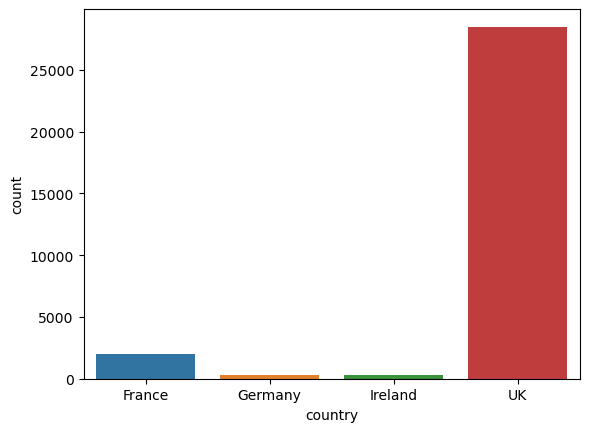

In [50]:
sns.countplot(x = df_final.country)

In [51]:
df_final.country.value_counts()

UK         28505
France      1975
Ireland      341
Germany      314
Name: country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='city'>

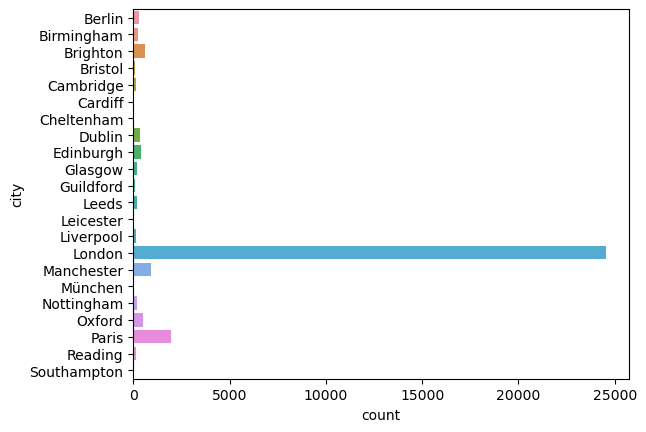

In [52]:
sns.countplot(y = df_final.city)

In [53]:
df_final.city.value_counts()

London         24530
Paris           1975
Manchester       913
Brighton         629
Oxford           521
Edinburgh        405
Dublin           341
Berlin           292
Birmingham       261
Nottingham       214
Leeds            214
Glasgow          168
Cambridge        165
Liverpool        148
Reading          122
Guildford        107
Bristol           82
München           22
Cheltenham        10
Leicester          9
Cardiff            5
Southampton        2
Name: city, dtype: int64

<AxesSubplot:xlabel='order_Weekday', ylabel='count'>

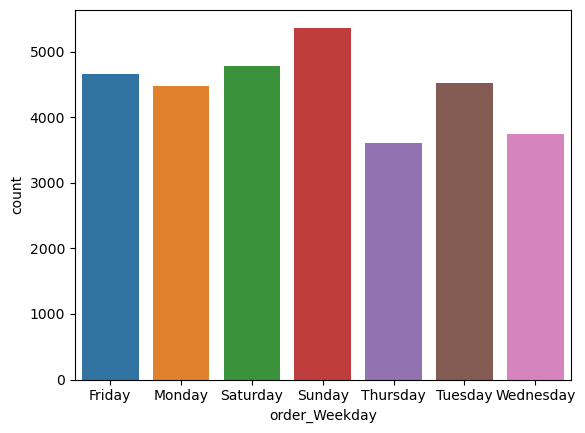

In [54]:
sns.countplot(x = df_final.order_Weekday)
#Most orders happen on Friday, Saturday, Sunday

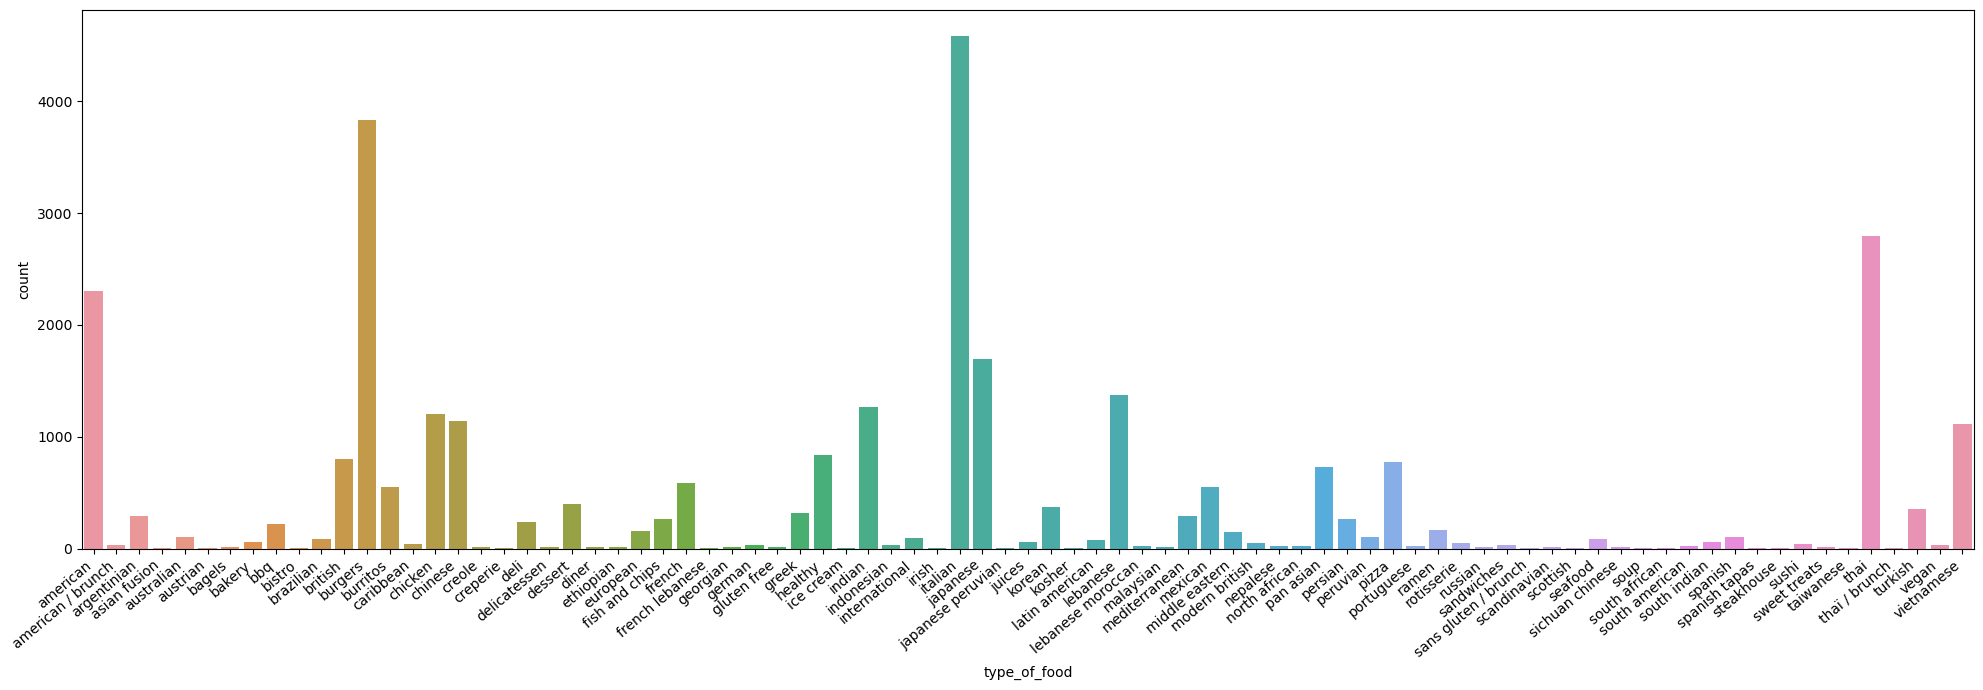

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
ax = sns.countplot(x = df_final.type_of_food)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

In [56]:
df_final.type_of_food.value_counts()

italian              4589
burgers              3833
thai                 2799
american             2307
japanese             1697
                     ... 
french lebanese         2
steakhouse              2
thaï / brunch           2
japanese peruvian       1
soup                    1
Name: type_of_food, Length: 83, dtype: int64

# 2. Bi-variate Analysis

In [57]:
pd.crosstab(df_final.country , df_final.number_of_items)

number_of_items,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
country,,,,,,,,,,,,,,,
France,193,523,499,350,157,102,53,29,28,13,10,8,4,6,0
Germany,15,89,100,52,25,16,8,5,2,2,0,0,0,0,0
Ireland,8,89,85,84,39,24,6,3,2,0,0,0,0,1,0
UK,1135,5419,7952,5684,3276,1999,1120,663,427,279,197,125,106,80,43


In [58]:
pd.crosstab(df_final.order_Weekday , df_final.number_of_items)

number_of_items,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
order_Weekday,,,,,,,,,,,,,,,
Friday,196,883,1221,944,551,357,178,114,51,61,37,20,19,12,7
Monday,202,902,1315,878,489,247,146,98,59,27,44,16,21,18,6
Saturday,173,878,1265,998,560,370,213,117,79,43,34,20,15,9,0
Sunday,209,988,1446,1113,649,378,224,123,87,45,37,28,16,11,11
Thursday,161,725,1049,694,406,246,129,70,53,26,17,14,8,9,4
Tuesday,223,937,1264,835,482,303,165,102,78,49,23,20,21,15,9
Wednesday,187,807,1076,708,360,240,132,76,52,43,15,15,10,13,6


In [59]:
pd.crosstab(df_final.city , df_final.number_of_items)

number_of_items,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
city,,,,,,,,,,,,,,,
Berlin,15,83,92,52,22,13,7,4,2,2,0,0,0,0,0
Birmingham,19,57,54,54,40,19,9,5,1,1,0,1,1,0,0
Brighton,28,111,210,131,77,34,23,5,3,4,2,0,1,0,0
Bristol,3,11,29,18,11,4,3,1,1,1,0,0,0,0,0
Cambridge,11,36,58,32,14,8,3,2,1,0,0,0,0,0,0
Cardiff,0,0,0,2,1,0,0,0,0,0,1,0,0,0,1
Cheltenham,0,3,6,0,0,0,0,0,1,0,0,0,0,0,0
Dublin,8,89,85,84,39,24,6,3,2,0,0,0,0,1,0
Edinburgh,21,54,110,85,51,30,11,20,15,3,3,1,0,1,0


In [60]:
pd.crosstab(df_final.type_of_food , df_final.number_of_items)

number_of_items,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
type_of_food,,,,,,,,,,,,,,,
american,92,415,742,486,289,142,63,30,15,14,6,8,4,1,0
american / brunch,3,10,12,1,1,0,0,0,0,0,0,0,0,0,0
argentinian,11,47,86,38,49,20,19,8,4,2,3,0,1,0,0
asian fusion,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
australian,5,13,31,33,16,6,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thai,90,503,800,621,376,185,92,58,27,15,19,5,6,1,1
thaï / brunch,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
turkish,20,71,123,53,30,29,9,4,5,1,4,1,1,1,0


In [61]:
conditions = [
    (df_final['prep_time_minutes'] < 1),
    ((df_final['prep_time_minutes'] >= 1) & (df_final['prep_time_minutes'] <= 5)),
    ((df_final['prep_time_minutes'] > 5) & (df_final['prep_time_minutes'] <= 10)),
    ((df_final['prep_time_minutes'] > 10) & (df_final['prep_time_minutes'] <= 20)),
    ((df_final['prep_time_minutes'] > 20) & (df_final['prep_time_minutes'] <= 30)),
    ((df_final['prep_time_minutes'] > 30) & (df_final['prep_time_minutes'] <= 40)),
    ((df_final['prep_time_minutes'] > 40) & (df_final['prep_time_minutes']<= 50)),
    ((df_final['prep_time_minutes'] > 50))]

values = ['bin_0', 'bin_1_5', 'bin_5_10', 'bin_10_20', 'bin_20_30', 'bin_30_40', 'bin_40_50', 'bin_50_60']
df_final['prep_bin'] = np.select(conditions, values)
df_final.head()

,order_value_gbp,number_of_items,country,city,type_of_food,order_Weekday,prep_time_minutes,prep_bin
1,24.00,8,UK,London,burritos,Saturday,10.050000,bin_10_20
2,15.25,3,UK,London,burritos,Monday,7.383333,bin_5_10
3,28.05,8,UK,London,burritos,Friday,11.150000,bin_10_20
4,56.30,7,UK,London,chinese,Monday,55.233333,bin_50_60
5,18.20,3,UK,London,chinese,Monday,17.483333,bin_10_20


In [62]:
pd.crosstab(df_final.country , df_final.prep_bin)

prep_bin,bin_0,bin_10_20,bin_1_5,bin_20_30,bin_30_40,bin_40_50,bin_50_60,bin_5_10
country,,,,,,,,
France,478,300,606,99,45,29,20,398
Germany,3,145,23,41,10,8,5,79
Ireland,4,136,26,78,13,6,7,71
UK,630,13003,1915,4673,1190,640,435,6019


In [63]:
df_final.drop(['order_Weekday'], axis =1 , inplace = True)

<AxesSubplot:xlabel='number_of_items', ylabel='prep_bin'>

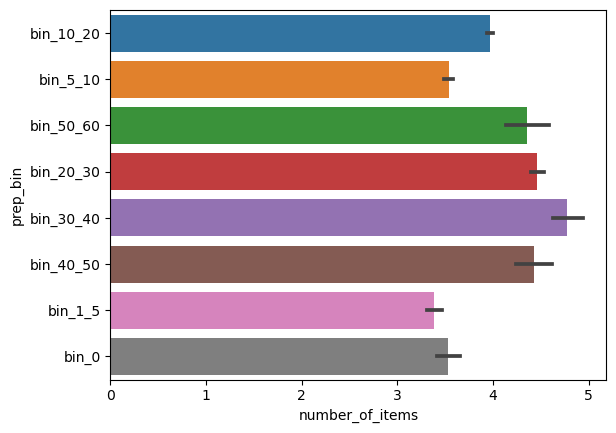

In [65]:
sns.barplot(data=df_final, x="number_of_items", y="prep_bin")

<AxesSubplot:xlabel='number_of_items', ylabel='city'>

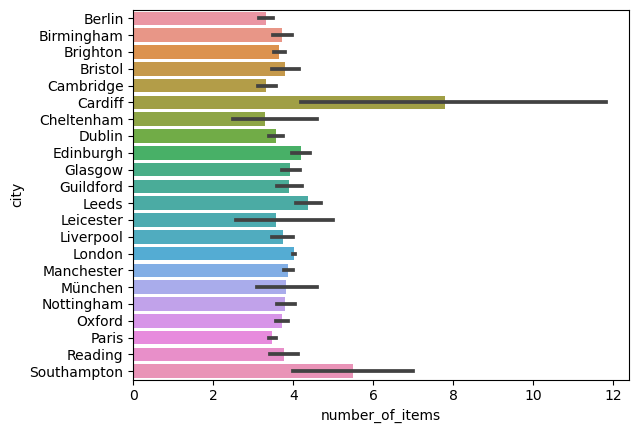

In [66]:
sns.barplot(data=df_final, x="number_of_items", y="city")

<AxesSubplot:xlabel='country', ylabel='city'>

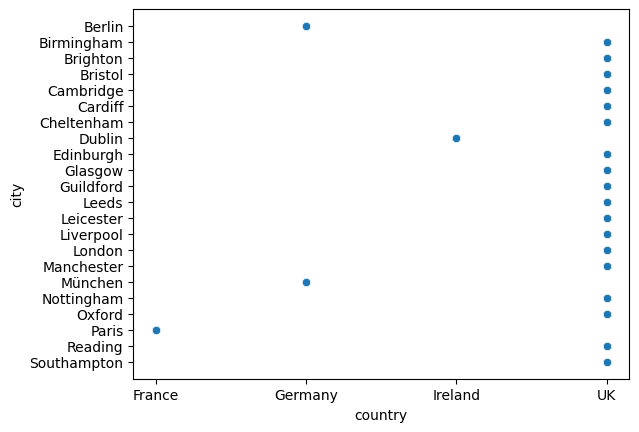

In [67]:
sns.scatterplot(data=df_final, y="city", x = "country")

<AxesSubplot:xlabel='prep_time_minutes', ylabel='order_value_gbp'>

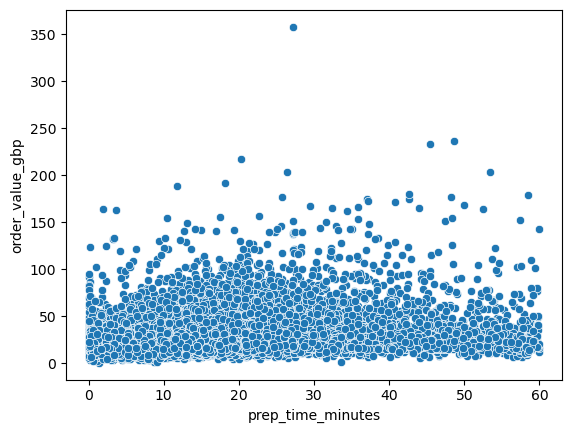

In [68]:
sns.scatterplot(x = df_final.prep_time_minutes, y = df_final.order_value_gbp)

In [69]:
df_final["city"].value_counts()

London         24530
Paris           1975
Manchester       913
Brighton         629
Oxford           521
Edinburgh        405
Dublin           341
Berlin           292
Birmingham       261
Nottingham       214
Leeds            214
Glasgow          168
Cambridge        165
Liverpool        148
Reading          122
Guildford        107
Bristol           82
München           22
Cheltenham        10
Leicester          9
Cardiff            5
Southampton        2
Name: city, dtype: int64

In [70]:
df_final.prep_time_minutes.describe()
# It shows that prep_time 19.51 accounts 75% of the data

count    31135.000000
mean        15.142520
std         10.294266
min          0.000000
25%          8.433333
50%         13.283333
75%         19.516667
max         60.000000
Name: prep_time_minutes, dtype: float64

In [71]:
df_final["order_value_gbp"].describe()
# gbp value <= 29.90 accounts for 75%

count    31135.000000
mean        25.692510
std         15.132611
min          0.500000
25%         16.670000
50%         21.200000
75%         29.900000
max        357.900000
Name: order_value_gbp, dtype: float64

In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31135 entries, 1 to 32393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   order_value_gbp    31135 non-null  float64 
 1   number_of_items    31135 non-null  int64   
 2   country            31135 non-null  category
 3   city               31135 non-null  category
 4   type_of_food       31135 non-null  category
 5   prep_time_minutes  31135 non-null  float64 
 6   prep_bin           31135 non-null  object  
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 1.3+ MB


In [73]:
df_final.corr()

,order_value_gbp,number_of_items,prep_time_minutes
order_value_gbp,1.000000,0.516163,0.238189
number_of_items,0.516163,1.000000,0.164135
prep_time_minutes,0.238189,0.164135,1.000000


In [74]:
# df_final.drop(['order_value_gbp'], axis = 1, inplace = True)

# <b><font color = 'blue'> One-hot Encoding

In [75]:
df_final.drop(['prep_bin'], axis = 1, inplace = True)
df_final= pd.get_dummies(df_final, drop_first = True)

In [76]:
df_final.head()


,order_value_gbp,number_of_items,prep_time_minutes,country_Germany,country_Ireland,country_UK,city_Birmingham,city_Brighton,city_Bristol,city_Cambridge,...,type_of_food_spanish tapas,type_of_food_steakhouse,type_of_food_sushi,type_of_food_sweet treats,type_of_food_taiwanese,type_of_food_thai,type_of_food_thaï / brunch,type_of_food_turkish,type_of_food_vegan,type_of_food_vietnamese
1,24.00,8,10.050000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.25,3,7.383333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.05,8,11.150000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.30,7,55.233333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18.20,3,17.483333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <b><font color = blue>Model Building

In [77]:
#Train Test Split the data into two groups
x = df_final.drop(['prep_time_minutes'], axis = 1)
y = df_final.prep_time_minutes
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 20)

In [78]:
# Model 1

In [79]:
#Scale the data
min_max_scaler = MinMaxScaler()
mm_X_train = min_max_scaler.fit_transform(x_train)
mm_X_test = min_max_scaler.transform (x_test)
linear_reg = LinearRegression()
linear_reg.fit(mm_X_train, y_train)
y_pred= linear_reg.predict(mm_X_test)
metrics_eval = { "Mean Squared error" : mean_squared_error(y_test,y_pred), "Mean Absolute error" : mean_absolute_error(y_test,y_pred),"R2": r2_score(y_test,y_pred) }
print(metrics_eval)

{'Mean Squared error': 92.12940496559766, 'Mean Absolute error': 6.80321669420551, 'R2': 0.12421525329176997}


In [80]:
# Model 2

In [81]:
from sklearn import ensemble
xgb_reg = ensemble.GradientBoostingRegressor()
xgb_reg.fit(x_train, y_train)
y_pred= xgb_reg.predict(x_test)
metrics_eval = { "Mean Squared error" : mean_squared_error(y_test,y_pred), "Mean Absolute error" : mean_absolute_error(y_test,y_pred),"R2": r2_score(y_test,y_pred) }
print(metrics_eval)

{'Mean Squared error': 91.84294882455167, 'Mean Absolute error': 6.809504623816421, 'R2': 0.12693831352452256}


In [82]:
# Model 3

In [83]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state= 20)
param_of_grids = {'n_estimators' : [10,50],
                  'max_features' : ['auto', 'sqrt'],
                  'max_depth' : [5,10,15],
                  'bootstrap' : [True, False]}
grid = GridSearchCV(estimator, param_of_grids , cv = 5)
grid.fit(x_train, y_train)
best_param = grid.best_estimator_
best_res = grid.best_params_
print(best_res)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}


In [84]:
rf_reg = RandomForestRegressor(bootstrap = True, max_depth = 15, max_features = 'sqrt', n_estimators = 50, random_state = 20)
rf_reg.fit(x_train, y_train)
y_pred= rf_reg.predict(x_test)
metrics_eval = { "Mean Squared error" : mean_squared_error(y_test,y_pred), "Mean Absolute error" : mean_absolute_error(y_test,y_pred),"R2": r2_score(y_test,y_pred) }
print(metrics_eval)


{'Mean Squared error': 92.15070729803878, 'Mean Absolute error': 6.8061598550442906, 'R2': 0.12401275271306533}
